In [1]:
## preamble 
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from cv import *
import cv2
from scipy.ndimage import maximum_filter
import skimage.feature

# Week 6 - Transform Invariant Features 

## Harris Corner detector

### Exercise 06.A

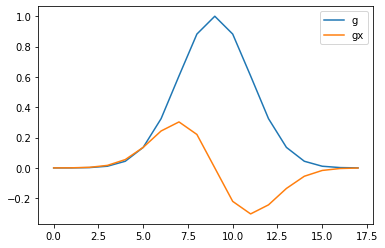

In [2]:
def gaussian1DKernel(s):
    # g = 1D gaussian kernel
    # gx = derivative of g
    # s = gaussian width (sigma)
    kSize = 4; # kernelsize
    t = s**2
    v = kSize*s;
    x = np.arange(-np.ceil(v+1),np.ceil(v+1));
    g = np.exp(-x**2/(2*t));
    gx = -x/(t)*g;
    g = g.reshape((-1,1))
    gx = gx.reshape((-1,1))
    
    return g, gx

s = 2
g, gx = gaussian1DKernel(s)

plt.plot(g)
plt.plot(gx)
plt.legend(["g", "gx"])


### Exercise 06.B

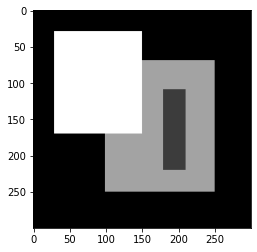

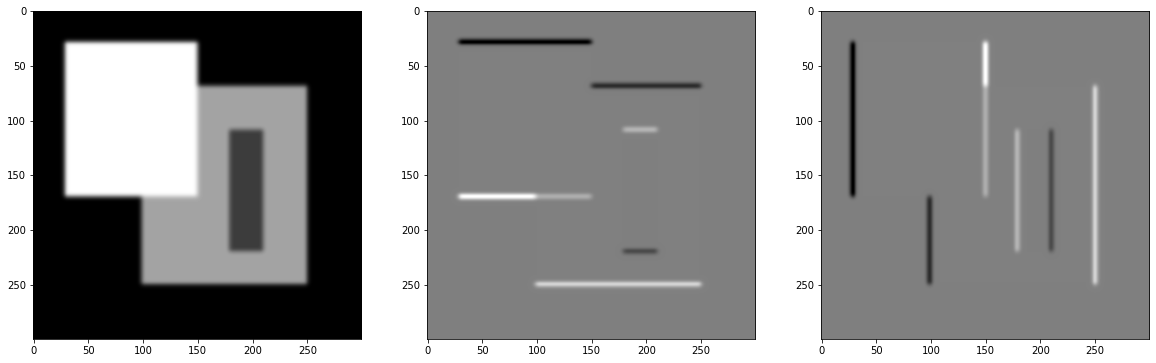

In [4]:
def gaussianSmoothing(im, s):
    # I = gaussian smoothed image of im
    # Ix and Iy = smoothed derivatives of the image im
    # im = original image 
    # sigma = gaussian width

    g, gx = gaussian1DKernel(s)
    I = cv2.filter2D(cv2.filter2D(im,-1,g),-1,g.T);
    Ix = cv2.filter2D(cv2.filter2D(im,-1,gx),-1,g.T);
    Iy = cv2.filter2D(cv2.filter2D(im,-1,g),-1,gx.T);
    
    return I, Ix, Iy

filename = 'TestIm1.png'
im = cv2.imread('/Users/s174162/OneDrive/Studie/Kandidat/1. semester/Computer vision/Week 6/week06_data/'+filename)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY).astype(np.float)/255.0
plt.imshow(im,cmap='gray')

I, Ix, Iy = gaussianSmoothing(im, s)
fig, ax = plt.subplots(figsize=(20,10), nrows=1, ncols=3)
ax[0].imshow(I,cmap='gray')
ax[1].imshow(Ix,cmap='gray')
ax[2].imshow(Iy,cmap='gray')
plt.show()


### Exercise 06.C

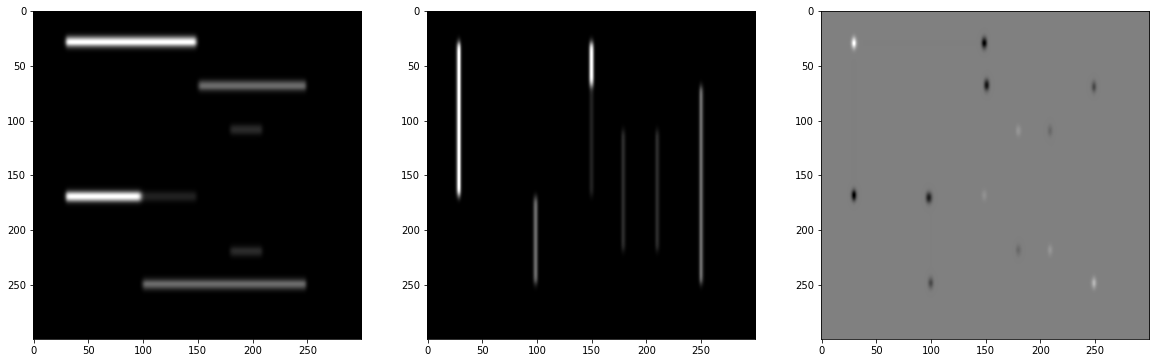

In [140]:
def smoothedHession(im, s, eps):  
    g, gx = gaussian1DKernel(s)
    g_eps, gx_eps = gaussian1DKernel(eps)
    I, Ix, Iy = gaussianSmoothing(im, s)
    
    # elements in C matrix
    a = cv2.filter2D(Ix**2,-1,g_eps) # upper left corner
    b = cv2.filter2D(Iy**2,-1,g_eps) # lower right corner
    c = cv2.filter2D(Ix*Iy,-1,g_eps) # upper right corner = lower left corner
    
    return a, b, c

eps = 3
a, b, c = smoothedHession(im, s, eps)
fig, ax = plt.subplots(figsize=(20,10), nrows=1, ncols=3)
ax[0].imshow(a,cmap='gray')
ax[1].imshow(b,cmap='gray')
ax[2].imshow(c,cmap='gray')
plt.show()

### Exercise 06.D

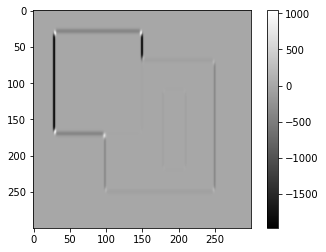

In [141]:
def harrisMeasure(im, s, eps, k):
    a, b, c = smoothedHession(im, s, eps)
    r = a*b-c**2-k*(a+b)**2
    
    return r

k = 0.06
r = harrisMeasure(im, s, eps, k)
plt.imshow(r,cmap='gray')
plt.colorbar()

### Exercise 06.E

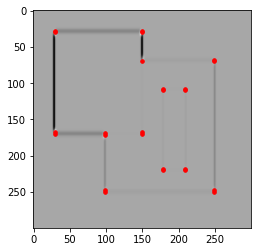

In [142]:
from scipy.ndimage import maximum_filter

def cornerDetector(im, s, eps, k, tau):
    # c = list of points where r is the local maximum and larger than some relative threshold i.e. r(x,y) > tau  
    r = harrisMeasure(im, s, eps, k)
    footprint = np.array([[0, 1, 0],
                          [1, 0, 1],
                          [0, 1, 0]])
    maxs = maximum_filter(r, footprint=footprint)
    col,row = np.where(maxs!=0) # get indices of local maxima
    vals = r[col,row]

    row = row[vals > tau]
    col = col[vals > tau]
    
    c = np.array([row,col])
    
    return c

s = 0.1
eps = 0.5
k = 0.06
tau = 0

c = cornerDetector(im, s, eps, k, tau)

plt.imshow(r,cmap='gray')

plt.scatter(c[0,:], c[1,:],s=50,c='r',marker='.')
plt.show()
